<a href="https://colab.research.google.com/github/mk7890/Machine-Learning-II/blob/main/ML2_NeuraNetworks_CreditCardFraudDetection_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# !pip install tensorflow
# !pip install --upgrade keras

# Libraries

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


In [8]:
import tensorflow as tf
import keras

In [ ]:
print(f"tensorflow version: {tf.__version__}")
print(f"keras version {keras.__version__}")

tensorflow version: 2.17.1
keras version 3.8.0


# Load Dataset

In [3]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 92% 61.0M/66.0M [00:00<00:00, 230MB/s]
100% 66.0M/66.0M [00:00<00:00, 214MB/s]


In [4]:

import zipfile
zipfile_path = '/content/creditcardfraud.zip'
csv_file = zipfile_path.replace('zip', '')
with zipfile.ZipFile(zipfile_path, 'r') as file:
  file.extractall()
  print('Done')

Done


In [5]:
data = pd.read_csv("/content/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

INSPECT THE DATASET

In [9]:
# Assuming the dataset is a CSV file
print(data.info())
print(data['Class'].value_counts())  # Check class distribution


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Insight: There's observable class imbalance in the "Class" column (0:284315, 1:492)

# Preprocessing

## Handling class Imbalance

In [10]:
from imblearn.over_sampling import SMOTE

X = data.drop('Class', axis=1)
y = data['Class']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [13]:
print(f"X_resampled shape: {X_resampled.shape}")
print(f"y_resampled shape: {y_resampled.shape}")

X_resampled shape: (568630, 30)
y_resampled shape: (568630,)


## Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [14]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (454904, 30)
X_test shape: (113726, 30)
y_train shape: (454904,)
y_test shape: (113726,)


## Feature Scaling
standardize the features for faster convergence

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neural Network Modeling
Define a sequential model with dense layers

In [16]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Train and evaluate the model
Use early stoppage to prevent overfitting

In [17]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)

Epoch 1/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9534 - loss: 0.1236 - val_accuracy: 0.9932 - val_loss: 0.0232
Epoch 2/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.9878 - loss: 0.0359 - val_accuracy: 0.9955 - val_loss: 0.0154
Epoch 3/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9905 - loss: 0.0279 - val_accuracy: 0.9966 - val_loss: 0.0125
Epoch 4/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9913 - loss: 0.0251 - val_accuracy: 0.9975 - val_loss: 0.0109
Epoch 5/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9917 - loss: 0.0229 - val_accuracy: 0.9982 - val_loss: 0.0088
Epoch 6/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.9924 - loss: 0.0216 - val_accuracy: 0.9977 - val_loss: 0.0095
Epoch 7/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.9925 - loss: 0.0209 - val_accuracy: 0.9976 - val_loss: 0.0090
Epoch 8/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 

In [24]:
# Get the best epoch from the history
best_epoch = np.argmin(history.history['val_loss']) + 1  # Add 1 because epochs are 1-indexed

# Print the best epoch and the corresponding validation loss
best_val_loss = history.history['val_loss'][best_epoch - 1]
print(f"Best epoch: {best_epoch}")
print(f"Validation loss at best epoch: {best_val_loss}")

# The model already has the best weights restored due to `restore_best_weights=True`

Best epoch: 19
Validation loss at best epoch: 0.005415167193859816


EVALUATE THE MODEL

Compare performance with the test data

In [26]:
# Evaluate the best model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.005900056567043066
Test Accuracy: 0.9988217353820801


In [18]:
# Test evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predictions and evaluation
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 998us/step - accuracy: 0.9989 - loss: 0.0055
Test Loss: 0.005900056567043066
Test Accuracy: 0.9988217353820801
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

[[56638   112]
 [   22 56954]]


VISUALIZATIONS

Loss and Accuracy training curves

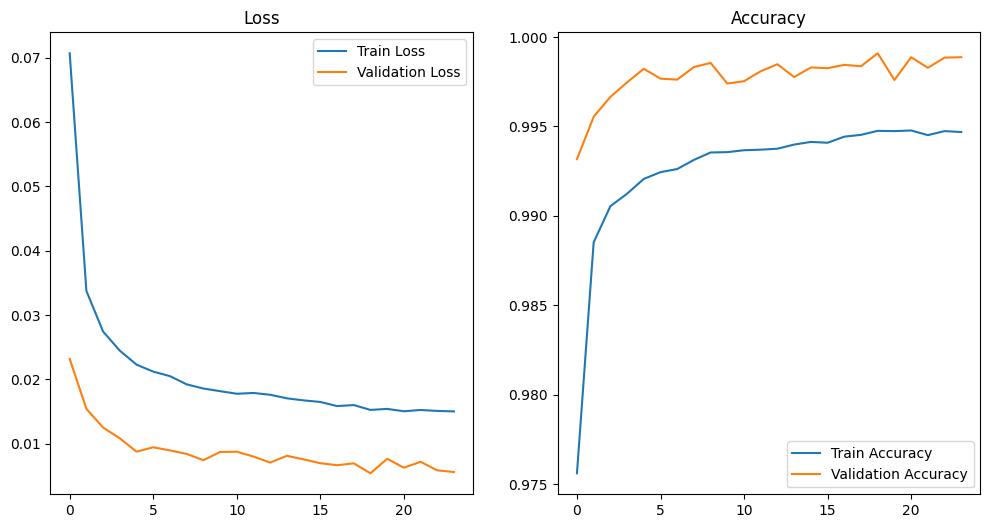

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


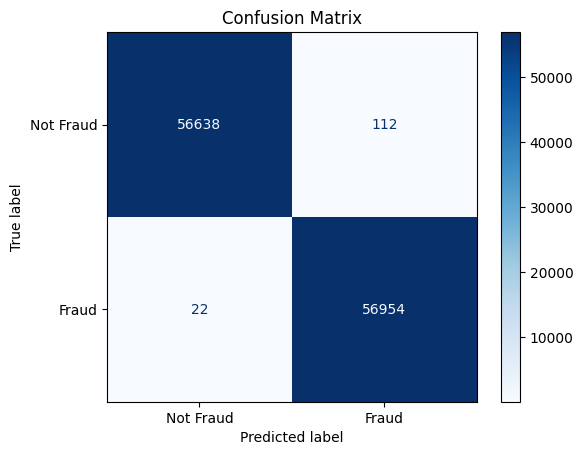

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred) # Step 1: Compute the confusion matrix
# Step 2: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

SAVE THE MODEL

In [20]:
model.save("credit_card_fraud_model.h5")

## Predicitons on new data

In [21]:
from tensorflow.keras.models import load_model
# Load the trained model
model = load_model("credit_card_fraud_model.h5")

Sample input (input should matche the feature scaling and structure used during training)

In [22]:
import numpy as np
# Example raw input (replace with real values)
sample_data = np.array([
    [0, -1.35980713, 1.19185711, -1.35835406, -0.96627171, -0.23279437,
     1.76389197, 0.80298213, 0.47648186, 0.6767893, 1.23423536, -0.0089831,
     0.5621996, -0.97530424, 0.03213234, -0.42354529, 0.02168656, 0.08055759,
     0.407214, 0.29207228, 0.699529, -0.60564698, 0.48526255, -0.20193686,
     0.89262156, -0.54249179, 0.56867773, -0.69289432, 0.003, 149.62]])

sample_data_scaled = scaler.transform(sample_data) # Scale the sample using the same scaler used during training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


MAKE PREDICTIONS

In [23]:
prediction_prob = model.predict(sample_data_scaled) # Predict the probability of fraud
prediction_class = (prediction_prob > 0.5).astype("int32") # Convert probability to binary classification
print(f"Prediction Probability: {prediction_prob[0][0]}")
print(f"Prediction Class: {'Fraud' if prediction_class[0][0] == 1 else 'Not Fraud'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction Probability: 3.5723879248246134e-17
Prediction Class: Not Fraud
